# Il modello unifattoriale {#sec-fa-model-1}

::: {.chapterintro data-latex=""}
L'analisi fattoriale è un modello statistico che consente di spiegare le correlazioni tra variabili osservate mediante la loro saturazione in uno o più fattori generali. In questo modello, le $p$ variabili osservate (item) sono considerate condizionalmente indipendenti rispetto a $m$ variabili latenti chiamate fattori. L'obiettivo dell'analisi fattoriale è di interpretare questi fattori come costrutti teorici inosservabili. Ad esempio, l'analisi fattoriale può essere utilizzata per spiegare le correlazioni tra le prestazioni di un gruppo di individui in una serie di compiti mediante il concetto di intelligenza. In questo modo, l'analisi fattoriale aiuta a identificare i costrutti cui gli item si riferiscono e a stabilire in che misura ciascun item rappresenta il costrutto. Il modello può essere unifattoriale ($m = 1$) o multifattoriale ($m > 1$), e in questo capitolo si introdurrà il modello unifattoriale che assume l'esistenza di un unico fattore comune latente.
:::

**Prerequisiti**

- Leggere il capitolo 6, *Factor Analysis and Principal Component Analysis*, del testo *Principles of psychological assessment* di @petersen2024principles. 

**Concetti e Competenze Chiave**

- Correlazione parziale
- Teoria dei due fattori
- Annullamento della tetrade

**Preparazione del Notebook**

In [2]:
# Carica il file _common.R per impostazioni di pacchetti e opzioni
here::here("code", "_common.R") |> source()

# Carica pacchetti aggiuntivi
pacman::p_load(corrplot, tidyr, kableExtra, lavaanPlot, lavaanExtra)

## Introduzione

Nel contesto dell'analisi fattoriale, i costrutti teorici di interesse vengono rappresentati da variabili latenti, che riflettono le comunanze sottostanti tra un insieme di variabili manifeste (ovvero misurabili). Le variabili manifeste, come gli item di un questionario o gli indici derivati da un compito comportamentale, sono direttamente osservabili e vengono solitamente rappresentate graficamente come quadrati. Al contrario, le variabili latenti descrivono costrutti ipotetici non direttamente osservabili, come un fattore latente di intelligenza o memoria, e sono rappresentate come cerchi nei diagrammi.

Il legame tra variabili latenti e manifeste si esprime tramite i *carichi fattoriali*, cioè percorsi che collegano una variabile latente a una variabile osservabile. L'intensità di un carico fattoriale indica la quota di varianza osservata spiegata dal fattore latente. In altre parole, il carico fattoriale riflette la capacità di una data variabile manifesta di rappresentare il costrutto latente.

Dal punto di vista matematico, l’analisi fattoriale descrive ogni misura osservabile $y$ come la combinazione lineare del punteggio latente $\xi$ relativo al costrutto di interesse e di un elemento di errore non osservato $\delta$. In questo modello, il valore di $y$ è interpretato come il prodotto del punteggio latente, ponderato da un coefficiente di carico $\lambda$, a cui si somma un termine di errore specifico $\delta_y$:

$$
y = \lambda \xi + \delta_y.
$$

Un esempio concreto può aiutare a chiarire questo concetto: supponiamo di usare una bilancia non perfettamente affidabile per misurare il peso corporeo. Ogni lettura non rifletterà solo il peso reale della persona, ma includerà anche una componente di errore dovuta alla bilancia stessa, manifestando variazioni casuali tra una misurazione e l’altra.

Quando si dispone di più misure osservabili $y$ che rappresentano il medesimo costrutto latente $\xi$, diventa possibile stimare con maggiore accuratezza sia il punteggio reale latente $\xi$ sia la componente di errore di misura $\delta$. Questo permette di migliorare la precisione interpretativa dei dati e di ottenere una rappresentazione più affidabile del costrutto teorico di interesse.

## Modello monofattoriale

Con $p$ variabili manifeste $y_i$, il caso più semplice è quello di un solo fattore comune: 

$$
\begin{equation}
y_i = \mu_i + \lambda_{i} \xi +  1 \cdot \delta_i \qquad i=1, \dots, p,
\end{equation}
$$ {#eq-mod-unifattoriale}

dove $\xi$ rappresenta il fattore comune a tutte le $y_i$, $\delta_i$ sono i fattori specifici o unici di ogni variabile osservata e $\lambda_i$ sono le saturazioni (o pesi) fattoriali le quali stabiliscono il peso del fattore latente su ciascuna variabile osservata.

Il modello di analisi fattoriale e il modello di regressione possono sembrare simili, ma presentano alcune differenze importanti. In primo luogo, sia il fattore comune $\xi$ sia i fattori specifici $\delta_i$ sono inosservabili, il che rende tutto ciò che si trova a destra dell'uguaglianza incognito. In secondo luogo, l'analisi di regressione e l'analisi fattoriale hanno obiettivi diversi. L'analisi di regressione mira a individuare le variabili esplicative, osservabili direttamente, che sono in grado di spiegare la maggior parte della varianza della variabile dipendente. Al contrario, il problema dell'analisi unifattoriale consiste nell'identificare la variabile esplicativa inosservabile che è in grado di spiegare la maggior parte della covarianza tra le variabili osservate.

Solitamente, per comodità, si assume che la media delle variabili osservate $y_i$ sia zero, ovvero $\mu_i=0$. Ciò equivale a considerare gli scarti delle variabili rispetto alle rispettive medie. Il modello unifattoriale assume che le variabili osservate siano il risultato della combinazione lineare di un fattore comune $\xi$ e dei fattori specifici $\delta_i$, ovvero:

$$
\begin{equation}
y_i -\mu_i = \lambda_i \xi + 1 \cdot \delta_i,
\end{equation}
$$ {#eq-mod-monofattoriale}

dove $\lambda_i$ è la saturazione o il peso della variabile $i$-esima sul fattore comune e $\delta_i$ rappresenta il fattore specifico della variabile $i$-esima. Si assume che il fattore comune abbia media zero e varianza unitaria, mentre i fattori specifici abbiano media zero, varianza $\psi_{i}$ e siano incorrelati tra loro e con il fattore comune. Nel modello unifattoriale, l'interdipendenza tra le variabili è completamente spiegata dal fattore comune.

Le ipotesi precedenti consentono di ricavare la covarianza tra la variabile osservata $y_i$ e il fattore comune, la varianza della variabile osservata $y_i$ e la covarianza tra due variabili osservate $y_i$ e $y_k$. L'obiettivo della discussione in questo capitolo è appunto quello di analizzare tali grandezze statistiche.

## Correlazione parziale

Prima di entrare nel dettaglio del modello statistico dell'analisi fattoriale, è importante chiarire il concetto di correlazione parziale. Si attribuisce spesso a Charles Spearman la nascita dell'analisi fattoriale. Nel 1904, Spearman pubblicò un articolo intitolato "General Intelligence, Objectively Determined and Measured" in cui propose la Teoria dei Due Fattori. In questo articolo, dimostrò come fosse possibile identificare un fattore inosservabile a partire da una matrice di correlazioni, utilizzando il metodo dell'annullamento della tetrade (*tetrad differences*). L'annullamento della tetrade è un'applicazione della teoria della correlazione parziale che mira a stabilire se, controllando un insieme di variabili inosservabili chiamate fattori $\xi_j$, le correlazioni tra le variabili osservabili $Y_i$, al netto degli effetti lineari delle $\xi_j$, diventino statisticamente nulle.

Possiamo considerare un esempio con tre variabili: $Y_1$, $Y_2$ e $F$. La correlazione tra $Y_1$ e $Y_2$, $r_{1,2}$, può essere influenzata dalla presenza di $F$. Per calcolare la correlazione parziale tra $Y_1$ e $Y_2$ al netto dell'effetto lineare di $F$, dobbiamo trovare le componenti di $Y_1$ e $Y_2$ che sono linearmente indipendenti da $F$.

Per fare ciò, dobbiamo trovare la componente di $Y_1$ che è ortogonale a $F$. Possiamo calcolare i residui $E_1$ del modello:

$$
Y_1 = b_{01} + b_{11}F + E_1.
$$ {#eq-mod-reg-mult-fa}

La componente di $Y_1$ linearmente indipendente da $F$ è quindi data dai residui $E_1$. Possiamo eseguire un'operazione analoga per $Y_2$ per trovare la sua componente ortogonale a $F$. Calcolando la correlazione tra le due componenti così ottenute si ottiene la correlazione parziale tra $Y_1$ e $Y_2$ al netto dell'effetto lineare di $F$.

L'@eq-corr-parz consente di calcolare la correlazione parziale tra $Y_1$ e $Y_2$ al netto dell'effetto di $F$ a partire dalle correlazioni semplici tra le tre variabili $Y_1$, $Y_2$ e $F$. 

$$
\begin{equation}
r_{1,2 \mid F} = \frac{r_{12} - r_{1F}r_{2F}}{\sqrt{(1-r_{1F}^2)(1-r_{2F}^2)}}.
\end{equation}
$$ {#eq-corr-parz}

In particolare, la correlazione parziale $r_{1,2 \mid F}$ è data dalla differenza tra la correlazione $r_{12}$ tra $Y_1$ e $Y_2$ e il prodotto tra le correlazioni $r_{1F}$ e $r_{2F}$ tra ciascuna delle due variabili e $F$, il tutto diviso per la radice quadrata del prodotto delle differenze tra 1 e i quadrati delle correlazioni tra $Y_1$ e $F$ e tra $Y_2$ e $F$. In altre parole, la formula tiene conto dell'effetto di $F$ sulle correlazioni tra $Y_1$ e $Y_2$ per ottenere una stima della relazione diretta tra le due variabili, eliminando l'effetto del fattore comune.

Consideriamo un esempio numerico. Sia $f$ una variabile su cui misuriamo $n$ valori

In [3]:
set.seed(123)
n <- 1000
f <- rnorm(n, 24, 12)

Siano $y_1$ e $y_2$ funzioni lineari di $f$, a cui viene aggiunta una componente d'errore gaussiano:

In [4]:
y1 <- 10 + 7 * f + rnorm(n, 0, 50)
y2 <- 3  + 2 * f + rnorm(n, 0, 50)

La correlazione tra $y_1$ e $y_2$ ($r_{12}= 0.355$) deriva dal fatto che $\hat{y}_1$ e $\hat{y}_2$ sono entrambe funzioni lineari di $f$:

In [11]:
Y <- cbind(y1, y2, f)
cor(Y) |>
    round(3)

,y1,y2,f
y1,1.000,0.380,0.867
y2,0.380,1.000,0.423
f,0.867,0.423,1.000


Eseguiamo le regressioni di $y_1$ su $f$ e di $y_2$ su $F$:

In [12]:
fm1 <- lm(y1 ~ f)
fm2 <- lm(y2 ~ f)

Nella regressione, ciascuna osservazione $y_{i1}$ viene scomposta in due componenti linearmente indipendenti, i valori adattati $\hat{y}_{i}$ e i residui, $e_{i}$: $y_i = \hat{y}_i + e_1$. Nel caso di $y_1$ abbiamo

In [15]:
cbind(y1, y1.hat=fm1$fit, e=fm1$res, fm1$fit+fm1$res) |>
    head() |>
    round(3)

,y1,y1.hat,e,
1,81.130,130.505,-49.375,81.130
2,106.667,159.704,-53.037,106.667
3,308.032,317.846,-9.813,308.032
4,177.314,186.285,-8.971,177.314
5,61.393,191.482,-130.089,61.393
6,374.094,331.668,42.426,374.094


Lo stesso può dirsi di $y_2$. La correlazione parziale $r_{12 \mid f}$
tra $y_1$ e $y_2$ dato $f$ è uguale alla correlazione di Pearson tra i
residui $e_1$ e $e_2$ calcolati mediante i due modelli di regressione
descritti sopra:

In [16]:
cor(fm1$res, fm2$res)

[1] 0.02828618

\
La correlazione parziale tra $y_1$ e $y_2$ al netto di $f$ è .02829. Per i dati esaminati sopra, dunque, la correlazione parziale tra le variabili $y_1$ e $y_2$ diventa uguale a zero se la variabile $f$ viene controllata (ovvero, se escludiamo da $y_1$ e da $y_2$ l'effetto lineare
di $f$). 

Il fatto che la correlazione parziale sia zero significa che la
correlazione che abbiamo osservato tra $y_1$ e $y_2$ ($r = 0.355$) non
dipendeva dall'effetto che una variabile $y$ esercitava sull'altra, ma
bensì dal fatto che c'era una terza variabile, $f$, che influenzava sia
$y_1$ sia $y_2$. In altre parole, le variabili $y_1$ e $y_2$ sono
condizionalmente indipendenti dato $f$. Ciò significa, come abbiamo
visto sopra, che la componente di $y_1$ linearmente indipendente da $f$
è incorrelata con la componente di $y_2$ linearmente indipendente da
$f$.

La correlazione che abbiamo calcolato tra i residui di due modelli di
regressione è identica alla correlazione che viene calcolata
applicando l'@eq-corr-parz:

In [17]:
(R[1, 2] - R[1, 3] * R[2, 3]) / 
  sqrt((1 - R[1, 3]^2) * (1- R[2, 3]^2)) |>
  round(3)

[1] 0.02827513

## Principio base dell'analisi fattoriale

Attualmente, l'inferenza statistica nell'analisi fattoriale spesso si svolge mediante il calcolo di stime della massima verosimiglianza ottenute mediante procedure iterative. All'inizio dell'analisi fattoriale, tuttavia, la procedura di estrazione dei fattori faceva leva sulle relazioni invarianti che il modello fattoriale impone agli elementi della matrice di covarianza delle variabili osservate. Il più conosciuto tra tali invarianti è la *tetrade* che si presenta nei modelli ad un fattore.

La tetrade è una combinazione di quattro correlazioni. Se l'associazione osservata tra le variabili dipende effettivamente dal fatto che le  variabili in questione sono state causalmente generate da un fattore comune inosservabile, allora è possibile generare una combinazione delle correlazioni tra le variabili che porta all'annullamento della tetrade. In altre parole, l'analisi fattoriale si chiede se esiste un insieme esiguo di $m<p$ variabili inosservabili che rendono significativamente nulle tutte le correlazioni parziali tra le $p$ variabili osservate al netto dei fattori comuni. Se il metodo della correlazione parziale consente di identificare $m$ variabili latenti, allora lo psicologo conclude che tali fattori corrispondono agli $m$ costrutti che intende misurare.

Per chiarire il metodo dell'annullamento della tetrade consideriamo la matrice di correlazioni riportata nella Tabella successiva. Nella tabella, la correlazione parziale tra ciascuna coppia di variabili 
$y_i$, $y_j$ (con $i \neq j$) dato $\xi$ è sempre uguale a zero. Ad esempio, la correlazione parziale tra $y_3$ e $y_5$ dato $\xi$ è:

$$
\begin{align}
  r_{35 \mid \xi} &= \frac{r_{35} - r_{3\xi}r_{5\xi}}
  {\sqrt{(1-r_{3\xi}^2)(1-r_{5\xi}^2)}} \notag \\[12pt]
  &= \frac{0.35 - 0.7 \times 0.5}
  {\sqrt{(1-0.7^2)(1-0.5^2)}} = 0. \notag
\end{align}
$$

Lo stesso risultato si trova per qualunque altra coppia di variabili $y_i$ e $y_j$, ovvero $r_{ij \mid \xi} = 0$.

|       | $\xi$ | $y_1$ | $y_2$ | $y_3$ | $y_4$ | $y_5$ |
|-------|-------|-------|-------|-------|-------|-------|
| $\xi$ | **1.00** |       |       |       |       |       |
| $y_1$ | **0.90** | 1.00  |       |       |       |       |
| $y_2$ | **0.80** | 0.72  | 1.00  |       |       |       |
| $y_3$ | **0.70** | 0.63  | 0.56  | 1.00  |       |       |
| $y_4$ | **0.60** | 0.54  | 0.48  | 0.42  | 1.00  |       |
| $y_5$ | **0.50** | 0.45  | 0.40  | 0.35  | 0.30  | 1.00  |
  
Possiamo dunque dire che, per la matrice di correlazioni della Tabella, esiste un'unica variabile $\xi$ la quale, quando viene controllata, spiega tutte le 

$$p(p-1)/2 = 5(5-1)/2=10$$ 

correlazioni tra le variabili $y$. Questo risultato non è sorprendente, in quanto la  matrice di correlazioni della Tabella è stata costruita in modo tale da possedere tale proprietà.

Ma supponiamo di essere in una situazione diversa, ovvero di avere osservato soltanto le variabili $y_i$ e di non conoscere $\xi$. In tali circostanze ci possiamo porre la seguente domanda: Esiste una variabile inosservabile $\xi$ la quale, se venisse controllata, renderebbe uguali a zero tutte le correlazioni parziali tra le variabili $y$? Se una tale variabile inosservabile esiste, ed è in grado di spiegare tutte le correlazioni tra le variabili osservate $y$, allora essa viene chiamata *fattore*. Arriviamo dunque alla seguente definizione: 

Un fattore è una variabile inosservabile in grado di rendere significativamente nulle tutte le correlazioni parziali tra le variabili manifeste.

## Vincoli sulle correlazioni

Come si può stabilire se esiste una variabile inosservabile in grado di rendere nulle tutte le correlazioni parziali tra le variabili osservate? Riscriviamo l'@eq-corr-parz per specificare la correlazione parziale tra le variabili $y_i$ e $y_j$ dato $\xi$:

$$
\begin{align}
  r_{ij \mid \xi} &= \frac{r_{ij} - r_{i\xi}r_{j\xi}}
  {\sqrt{(1-r_{i\xi}^2)(1-r_{j\xi}^2)}} 
\end{align}
$$

Affinché $r_{ij \mid \xi}$ sia uguale a zero è necessario che

$$
r_{ij} - r_{i\xi}r_{j\xi}=0
$$

ovvero

$$
\begin{equation}
r_{ij} = r_{i\xi}r_{j\xi}.
\end{equation}
$$

In altri termini, se esiste un fattore non osservato $\xi$ in grado di rendere uguali a zero tutte le correlazioni parziali $r_{ih \mid \xi}$, allora la correlazione tra ciascuna coppia di variabili $y$ deve essere uguale al prodotto delle correlazioni tra ciascuna $y$ e il fattore latente $\xi$. Questo è il principio base dell'analisi fattoriale. 

## Teoria dei Due Fattori

Per fare un esempio concreto relativo al metodo dell'annullamento della tetrade, esaminiamo la matrice di correlazioni originariamente analizzata da Spearman. Spearman (1904) raccolse alcune misure di capacità intellettuale su un piccolo numero di studenti di una scuola superiore. Nello specifico, esaminò i voti di tali studenti nelle seguenti materie: studio dei classici ($c$), letteratura inglese ($e$) e abilità matematiche ($m$). Considerò anche la prestazione in un compito di discriminazione dell'altezza di suoni ("pitch discrimination") ($p$), ovvero un'abilità diversa da quelle richieste nei test scolastici.  

Secondo la Teoria dei Due Fattori, le prestazioni relative ad un determinato compito intellettuale possiedono una componente comune (detta fattore 'g') con le prestazioni in un qualunque altro compito intellettuale e una componente specifica a quel determinato compito. Il modello dell'intelligenza di Spearman prevede dunque due fattori, uno generale e uno specifico (detto fattore 's'). Il fattore 'g' costituisce la componente invariante dell'abilità intellettiva, mente il fattore 's' è una componente che varia da condizione a condizione. 

Come è possibile stabilire se esiste una variabile latente in grado di spiegare le correlazioni tra le variabili osservate da Spearman? Lo strumento proposto da Spearman per rispondere a questa domanda è *l'annullamento della tetrade*. L'annullamento della tetrade utilizza i vincoli sulle correlazioni che derivano dalla definizione di correlazione parziale. In precedenza abbiamo visto che la correlazione parziale tra le variabili $y$ indicizzate da $i$ e $j$, al netto dell'effetto di $\xi$, è nulla se

$$
r_{ij} = r_{i\xi}r_{j\xi}.
$$

Nel caso dei dati di Spearman, dunque, le correlazioni parziali sono nulle se 
la correlazione tra ''studi classici'' e ''letteratura inglese'' è uguale al prodotto della correlazione tra ''studi classici'' e il fattore $\xi$ e della correlazione tra ''letteratura inglese'' e il fattore $\xi$. Inoltre, la correlazione tra ''studi classici'' e ''abilità matematica'' deve essere uguale al prodotto della correlazione tra ''studi classici'' e il fattore $\xi$ e della correlazione tra ''abilità matematica'' e il fattore $\xi$; e così via.

Le correlazioni tra le variabili manifeste e il fattore latente sono dette \textit{saturazioni fattoriali} e vengono denotate con la lettera $\lambda$. Se il modello di Spearman è corretto, avremo che

$$r_{ec}=\lambda_e \times \lambda_{c},$$ 

dove $r_{ec}$ è la correlazione tra ''letteratura inglese'' (e) e ''studi classici'' (c), $\lambda_e$ è la correlazione tra ''letteratura inglese'' e $\xi$, e $\lambda_{c}$ è la correlazione tra ''studi classici'' e $\xi$. 

Allo stesso modo, la correlazione tra ''studi classici'' e ''matematica'' (m) dovrà essere uguale a 

$$\lambda_c \times \lambda_m,$$ 

eccetera. 

## Annullamento della tetrade

Date le correlazioni tra tre coppie di variabili manifeste, il metodo dell'annullamento della tetrade

> in una matrice di correlazione, si selezionino quattro coefficienti nelle posizioni che marcano gli angoli di un rettangolo. La differenza tra i prodotti dei coefficienti che giacciono sulle due diagonali di tale rettangolo costituisce la differenza delle tetradi e deve essere uguale a zero.

rende possibile stimare i valori delle saturazioni fattoriali $\lambda$. Ad esempio, per le variabili $c$, $m$ ed $e$, possiamo scrivere le seguenti tre equazioni in tre incognite:

$$
\begin{align}
  r_{cm} &= \lambda_c \times \lambda_m, \notag \\
  r_{em} &= \lambda_e \times \lambda_m,  \\
  r_{ce} &= \lambda_c \times \lambda_e. \notag
\end{align}
$$

Risolvendo il precedente sistema di equazioni lineari, il coefficiente di saturazione $\lambda_m$ della variabile $y_m$ nel fattore comune $\xi$, ad esempio, pu{\`o} essere calcolato a partire dalle correlazioni tra le variabili manifeste $c$, $m$, ed $e$ nel modo seguente\footnote{
La terza delle equazioni del sistema lineare può essere riscritta come $\lambda_c = \frac{r_{ce}}{\lambda_e}$.

Utilizzando tale risultato, la prima equazione diventa $r_{cm} = \frac{r_{ce}}{\lambda_e}\lambda_m$. 
Dalla seconda equazione otteniamo $\lambda_e = \frac{r_{em}}{\lambda_m}$. Sostituendo questo risultato nell'equazione precedente otteniamo $r_{cm} = \frac{r_{ce}}{r_{em}}\lambda_m^2$, quindi $\lambda_m^2 = \frac{r_{cm} r_{em} }{r_{ce}}$.

Verifichiamo: $\frac{r_{cm} r_{em}}{r_{ce}} = \frac{\lambda_c \lambda_m \lambda_e \lambda_m}{\lambda_c \lambda_e} = \lambda_m^2$. 

$$
\begin{align}
  \lambda_m &= \sqrt{
    \frac{r_{cm} r_{em}}{r_{ce}}
    }. 
\end{align}
$$ {#eq-tetradi}

Lo stesso vale per le altre due saturazioni $\lambda_c$ e $\lambda_e$.

Nel suo articolo del 1904, Spearman osservò le seguenti correlazioni tra 
le variabili $Y_c$, $Y_e$, $Y_m$ e $Y_p$:

$$
\begin{array}{ccccc}
  \hline
    & Y_C & Y_E & Y_M & Y_P \\
  \hline
  Y_C & 1.00 & 0.78 & 0.70 & 0.66 \\
  Y_E &   & 1.00 & 0.64 & 0.54 \\
  Y_M &   &   & 1.00 & 0.45 \\
  Y_P &   &   &   & 1.00 \\
  \hline
\end{array}
$$

Utilizzando l'@eq-tetradi, mediante le correlazioni $r_{cm}$, $r_{em}$, e $r_{ce}$ fornite dalla tabella precedente, la saturazione $\lambda_m$ diventa uguale a:

$$
\begin{align}
  \hat{\lambda}_m &= \sqrt{ \frac{r_{cm} r_{em}}{r_{ce}} } = \sqrt{
    \frac{0.70 \times 0.64}{0.78} } = 0.76. \notag
\end{align}
$$

È importante notare che il metodo dell'annullamento della tetrade produce risultati falsificabili. 
Infatti, ci sono modi diversi per calcolare la stessa saturazione fattoriale. 
Se il modello fattoriale è corretto si deve ottenere lo stesso risultato in tutti i casi.  
Nel caso presente, la saturazione fattoriale $\lambda_m$ può essere calcolata in altri due modi:

$$
\begin{align}
  \hat{\lambda}_m &= \sqrt{ \frac{r_{cm} r_{mp}}{r_{cp}} } = \sqrt{ \frac{0.78 \times 0.45}{0.66} } = 0.69, \notag \\
  \hat{\lambda}_m &= \sqrt{ \frac{r_{em} r_{mp}}{r_{ep}} } = \sqrt{
    \frac{0.64 \times 0.45}{0.54} } = 0.73. \notag
\end{align}
$$

I tre valori che sono stati ottenuti sono molto simili. Qual è allora la stima migliore di  $\lambda_m$? 

## Metodo del centroide

La soluzione più semplice è quella di fare la media di questi tre valori ($\bar{\lambda}_m = 0.73$). 
Un metodo migliore (meno vulnerabile ai valori anomali) è dato dal rapporto tra la
somma dei numeratori e dei denominatori:

$$
\begin{align}
  \hat{\lambda}_m &= \sqrt{ \frac{0.70 \times 0.64 + 0.78 \times 0.45 + 0.64
      \times 0.45}{0.78+0.66+0.54} } = 0.73 \notag
\end{align}
$$

In questo caso, i due metodi danno lo stesso risultato. Le altre tre saturazioni fattoriali
trovate mediante il metodo del centroide sono: 

$$\hat{\lambda}_c = 0.97, \quad \hat{\lambda}_e = 0.84, \quad \hat{\lambda}_p = 0.65.$$ 

In conclusione, 

$$
\boldsymbol{\hat{\Lambda}}'=
(\hat{\lambda}_c, \hat{\lambda}_e, \hat{\lambda}_m, \hat{\lambda}_p) = (0.97, 0.84, 0.73, 0.65).
$$ 

Questo risultato è la soluzione proposta da Spearman nel suo articolo del 1904 per risolvere il problema di determinare le saturazioni fattoriali di un modello con un fattore comune latente.

## Introduzione a `lavaan`

Attualmente, l'analisi fattoriale viene svolta mediante software. Il pacchetto R più ampiamente utilizzato per condurre l'analisi fattoriale è `lavaan`. 

### Sintassi del modello

Al cuore del pacchetto `lavaan` si trova la "sintassi del modello". La sintassi del modello è una descrizione del modello da stimare. In questa sezione, spieghiamo brevemente gli elementi della sintassi del modello `lavaan`. 

Nell'ambiente R, una formula di regressione ha la seguente forma:

```
y ~ x1 + x2 + x3 + x4
```

In questa formula, la tilde ("~") è l'operatore di regressione. Sul lato sinistro dell'operatore, abbiamo la variabile dipendente (y), e sul lato destro abbiamo le variabili indipendenti, separate dall'operatore "+" . In `lavaan`, un modello tipico è semplicemente un insieme (o sistema) di formule di regressione, in cui alcune variabili (che iniziano con una 'f' qui sotto) possono essere latenti. Ad esempio:

```
y ~ f1 + f2 + x1 + x2
f1 ~ f2 + f3
f2 ~ f3 + x1 + x2
```

Se abbiamo variabili latenti in una qualsiasi delle formule di regressione, dobbiamo "definirle" elencando i loro indicatori (manifesti o latenti). Lo facciamo utilizzando l'operatore speciale "=~", che può essere letto come "è misurato da". Ad esempio, per definire le tre variabili latenti f1, f2 e f3, possiamo usare la sintassi seguente:

```
f1 =~ y1 + y2 + y3
f2 =~ y4 + y5 + y6
f3 =~ y7 + y8 + y9 + y10
```

Inoltre, le varianze e le covarianze sono specificate utilizzando un operatore "doppia tilde", ad esempio:

```
y1 ~~ y1 # varianza
y1 ~~ y2 # covarianza
f1 ~~ f2 # covarianza
```

E infine, le intercette per le variabili osservate e latenti sono semplici formule di regressione con solo una intercetta (esplicitamente indicato dal numero "1") come unico predittore:

```
y1 ~ 1
f1 ~ 1
```

Utilizzando questi quattro tipi di formule, è possibile descrivere una vasta gamma di modelli di variabili latenti. L'attuale insieme di tipi di formula è riassunto nella tabella sottostante.

| tipo di formula | operatore |  mnemonic |
| --------------- | --------- | --------- |
| definizione variabile latente | =~ | è misurato da |
| regressione | ~ | viene regredito su |
| (co)varianza (residuale) | ~~  |è correlato con |
| intercetta | ~ 1 | intercetta |

Una sintassi completa del modello lavaan è semplicemente una combinazione di questi tipi di formule, racchiusi tra virgolette singole. Ad esempio:

```
my_model <- ' 
  # regressions
  y1 + y2 ~ f1 + f2 + x1 + x2
  f1 ~ f2 + f3
  f2 ~ f3 + x1 + x2

  # latent variable definitions 
  f1 =~ y1 + y2 + y3 
  f2 =~ y4 + y5 + y6 
  f3 =~ y7 + y8 + y9
  
  # variances and covariances 
  y1 ~~ y1 
  y1 ~~ y2 
  f1 ~~ f2

  # intercepts 
  y1 ~ 1 
  f1 ~ 1
'
```

Per adattare il modello ai dati usiamo la seguente sintassi.

```
fit <- cfa(model = my_model, data = my_data)
```

### Un esempio concreto

Analizziamo nuovamente i dati di Spearman che abbiamo esaminato in precedenza usando `lavaan`. La matrice completa dei dati di Spearman è messa a disposizione da @kan2019extending. 

Specifichiamo il nome delle variabili manifeste

In [18]:
varnames <- c(
  "Classics", "French", "English", "Math", "Pitch", "Music"
)

e il loro numero

In [19]:
ny <- length(varnames)

Creiamo la matrice di correlazione:

In [21]:
spearman_cor_mat <- matrix(
  c(
    1.00,  .83,  .78,  .70,  .66,  .63,
     .83, 1.00,  .67,  .67,  .65,  .57,
     .78,  .67, 1.00,  .64,  .54,  .51,
     .70,  .67,  .64, 1.00,  .45,  .51,
     .66,  .65,  .54,  .45, 1.00,  .40,
     .63,  .57,  .51,  .51,  .40, 1.00
  ),
  ny, ny,
  byrow = TRUE,
  dimnames = list(varnames, varnames)
)
spearman_cor_mat

,Classics,French,English,Math,Pitch,Music
Classics,1.00,0.83,0.78,0.70,0.66,0.63
French,0.83,1.00,0.67,0.67,0.65,0.57
English,0.78,0.67,1.00,0.64,0.54,0.51
Math,0.70,0.67,0.64,1.00,0.45,0.51
Pitch,0.66,0.65,0.54,0.45,1.00,0.40
Music,0.63,0.57,0.51,0.51,0.40,1.00


Specifichiamo l'ampiezza campionaria:

In [22]:
n <- 33

Definiamo il modello unifattoriale in `lavaan`. L'operatore `=~` si può leggere dicendo che la variabile latente a sinistra dell'operatore viene identificata dalle variabili manifeste elencate a destra dell'operatore e separate dal segno `+`. Per il caso presente, il modello dei due fattori di Spearman può essere specificato come segue.

In [23]:
spearman_mod <- "
  g =~ Classics + French + English + Math + Pitch + Music
"

Adattiamo il modello ai dati con la funzione `cfa()`:

In [24]:
fit1 <- lavaan::cfa(
  spearman_mod,
  sample.cov = spearman_cor_mat,
  sample.nobs = n,
  std.lv = TRUE
)

La funzione `cfa()` è una funzione dedicata per adattare modelli di analisi fattoriale confermativa. Il primo argomento è il modello specificato dall'utente. Il secondo argomento è il dataset che contiene le variabili osservate. L'argomento `std.lv = TRUE` specifica che imponiamo una varianza pari a 1 a tutte le variabili latenti comuni (nel caso presente, solo una). Ciò consente di  stimare le saturazioni fattoriali.

Una volta adattato il modello, la funzione `summary()` ci consente di esaminare la soluzione ottenuta:

In [25]:
out = summary(
  fit1, 
  fit.measures = TRUE, 
  standardized = TRUE
)
print(out)

lavaan 0.6-19 ended normally after 23 iterations

  Estimator                                         ML
  Optimization method                           NLMINB
  Number of model parameters                        12

  Number of observations                            33

Model Test User Model:
                                                      
  Test statistic                                 2.913
  Degrees of freedom                                 9
  P-value (Chi-square)                           0.968

Model Test Baseline Model:

  Test statistic                               133.625
  Degrees of freedom                                15
  P-value                                        0.000

User Model versus Baseline Model:

  Comparative Fit Index (CFI)                    1.000
  Tucker-Lewis Index (TLI)                       1.086

Loglikelihood and Information Criteria:

  Loglikelihood user model (H0)               -212.547
  Loglikelihood unrestricted model (H1)       -2

L'output di `lavaan` si divide in tre sezioni principali:

1. **Intestazione**: Le prime nove righe dell'output costituiscono l'intestazione, che fornisce informazioni chiave sul modello e sull'analisi, tra cui:
   - **Versione di lavaan**: specifica la versione del pacchetto utilizzata.
   - **Esito dell'ottimizzazione**: indica se l'algoritmo di ottimizzazione è terminato correttamente e il numero di iterazioni necessarie.
   - **Stimatore**: mostra il metodo di stima utilizzato, come `ML` (massima verosimiglianza).
   - **Ottimizzatore**: specifica l'algoritmo di ottimizzazione (es., `NLMINB`) utilizzato per trovare i parametri migliori per lo stimatore selezionato.
   - **Numero di parametri del modello**: fornisce il totale dei parametri stimati nel modello (es., 12).
   - **Numero di osservazioni**: indica il numero di dati effettivamente utilizzati nell'analisi (es., 33).
   - **"Model Test User Model"**: contiene la statistica di test, i gradi di libertà e il valore p per il modello specificato dall'utente.

2. **Misure di adattamento**: Questa sezione, visibile solo con `fit.measures = TRUE`, presenta una serie di indicatori di adattamento del modello, iniziando dalla riga "Model Test Baseline Model" e terminando con il valore per l'SRMR. Questi indicatori forniscono informazioni sulla bontà del modello rispetto ai dati.

3. **Stime dei parametri**: Questa sezione contiene le stime dei parametri e inizia con dettagli tecnici sul metodo utilizzato per calcolare gli errori standard. Di seguito, sono elencati i parametri liberi e fissi del modello, in genere con ordine che parte dalle variabili latenti, seguito dalle covarianze e dalle varianze residue. Le colonne includono:
   - **Estimate**: indica il valore stimato (non standardizzato) per ciascun parametro, rappresentando il peso del collegamento tra il costrutto latente (es., `g`) e le variabili osservate.
   - **Std.err**: l'errore standard per ogni stima, utile per valutare l'accuratezza della stima.
   - **Z-value**: la statistica di Wald, calcolata dividendo la stima per il suo errore standard.
   - **P(>|z|)**: il valore p, utilizzato per testare l'ipotesi nulla che la stima sia zero nella popolazione.

**Ulteriori dettagli sulle colonne:**

- **Estimate**: Fornisce lo stimatore di massima verosimiglianza per i pesi dei percorsi, rappresentando l'effetto diretto di ogni costrutto latente sulle variabili osservate.
- **Std.lv**: Questi valori sono standardizzati solo rispetto alle variabili latenti, permettendo un confronto all'interno del modello indipendentemente dalle unità di misura originali.
- **Std.all**: Fornisce le stime completamente standardizzate, considerando sia le variabili latenti sia quelle osservate, facilitando un confronto dei coefficienti in termini di deviazioni standard.

Nella sezione delle **Varianze**, si osserva un punto prima dei nomi delle variabili osservate. Questo formato indica che sono variabili endogene, cioè predette dalle variabili latenti, e che il valore riportato rappresenta la varianza residua non spiegata dai predittori. Invece, le variabili latenti, che non hanno un punto prima del loro nome, sono considerate esogene; i valori riportati sono le loro varianze totali stimate.

È possibile semplificare l'output dalla funzione `summary()` in maniera tale da stampare solo la tabella completa delle stime dei parametri e degli errori standard. Qui usiamo `coef(fit1)`.

In [32]:
coef(fit1) |>
    print()  

       g=~Classics          g=~French         g=~English 
             0.942              0.857              0.795 
           g=~Math           g=~Pitch           g=~Music 
             0.732              0.678              0.643 
Classics~~Classics     French~~French   English~~English 
             0.083              0.234              0.338 
        Math~~Math       Pitch~~Pitch       Music~~Music 
             0.434              0.510              0.556 


Usando `parameterEstimates`, l'output diventa il seguente.

In [33]:
parameterEstimates(fit1, standardized = TRUE) |>
    print()

        lhs op      rhs   est    se     z pvalue ci.lower ci.upper
1         g =~ Classics 0.942 0.129 7.314  0.000    0.689    1.194
2         g =~   French 0.857 0.137 6.239  0.000    0.588    1.127
3         g =~  English 0.795 0.143 5.545  0.000    0.514    1.076
4         g =~     Math 0.732 0.149 4.923  0.000    0.441    1.024
5         g =~    Pitch 0.678 0.153 4.438  0.000    0.379    0.978
6         g =~    Music 0.643 0.155 4.142  0.000    0.339    0.948
7  Classics ~~ Classics 0.083 0.051 1.629  0.103   -0.017    0.183
8    French ~~   French 0.234 0.072 3.244  0.001    0.093    0.376
9   English ~~  English 0.338 0.094 3.610  0.000    0.154    0.522
10     Math ~~     Math 0.434 0.115 3.773  0.000    0.208    0.659
11    Pitch ~~    Pitch 0.510 0.132 3.855  0.000    0.251    0.769
12    Music ~~    Music 0.556 0.143 3.893  0.000    0.276    0.836
13        g ~~        g 1.000 0.000    NA     NA    1.000    1.000
   std.lv std.all
1   0.942   0.956
2   0.857   0.871
3   0.79

Con opportuni parametri possiamo semplificare l'output nel modo seguente.

In [34]:
parameterEstimates(fit1, standardized = TRUE) |>
  dplyr::filter(op == "=~") |>
  dplyr::select(
    "Latent Factor" = lhs,
    Indicator = rhs,
    B = est,
    SE = se,
    Z = z,
    "p-value" = pvalue,
    Beta = std.all
  ) |>
    print()

  Latent.Factor Indicator     B    SE     Z p.value  Beta
1             g  Classics 0.942 0.129 7.314       0 0.956
2             g    French 0.857 0.137 6.239       0 0.871
3             g   English 0.795 0.143 5.545       0 0.807
4             g      Math 0.732 0.149 4.923       0 0.743
5             g     Pitch 0.678 0.153 4.438       0 0.689
6             g     Music 0.643 0.155 4.142       0 0.653


Esaminiamo la matrice delle correlazioni residue:

In [35]:
residuals(fit1, type = "cor")$cov |>
    print()

         Clsscs French Englsh   Math  Pitch  Music
Classics  0.000                                   
French   -0.003  0.000                            
English   0.008 -0.033  0.000                     
Math     -0.011  0.023  0.040  0.000              
Pitch     0.001  0.050 -0.016 -0.062  0.000       
Music     0.005  0.001 -0.017  0.024 -0.050  0.000


Creiamo un qq-plot dei residui:

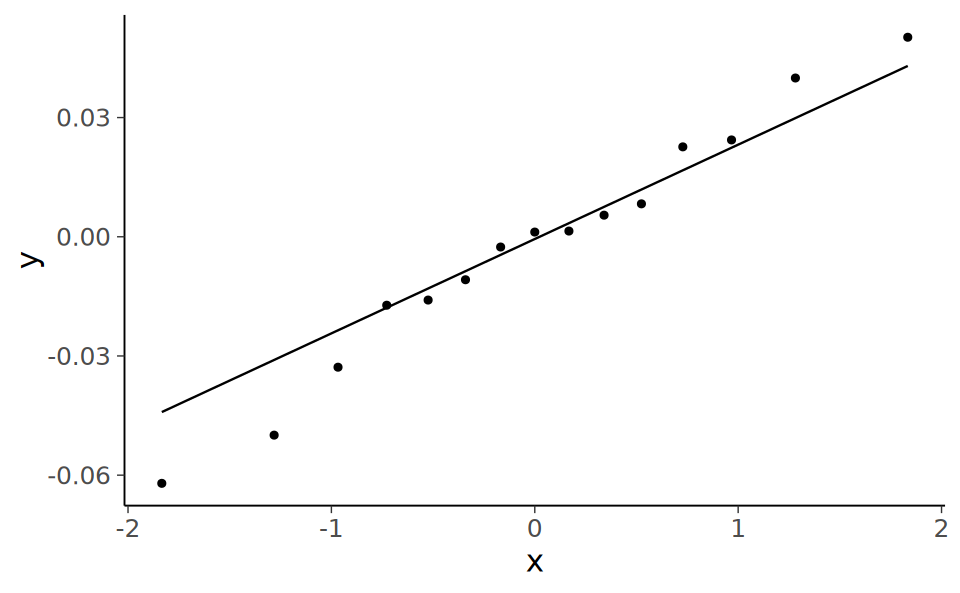

In [36]:
res1 <- residuals(fit1, type = "cor")$cov
res1[upper.tri(res1, diag = TRUE)] <- NA
v1 <- as.vector(res1)
v2 <- v1[!is.na(v1)]

tibble(v2) %>% 
  ggplot(aes(sample = v2)) + 
  stat_qq() + 
  stat_qq_line()

## Diagrammi di percorso

Il pacchetto `semPlot` consente di disegnare diagrammi di percorso per vari modelli SEM. La funzione `semPaths` prende in input un oggetto creato da `lavaan` e disegna il diagramma, con diverse opzioni disponibili. Il diagramma prodotto controlla le dimensioni dei caratteri/etichette, la visualizzazione dei residui e il colore dei percorsi/coefficienti. Sono disponibili queste e molte altre opzioni di controllo. 

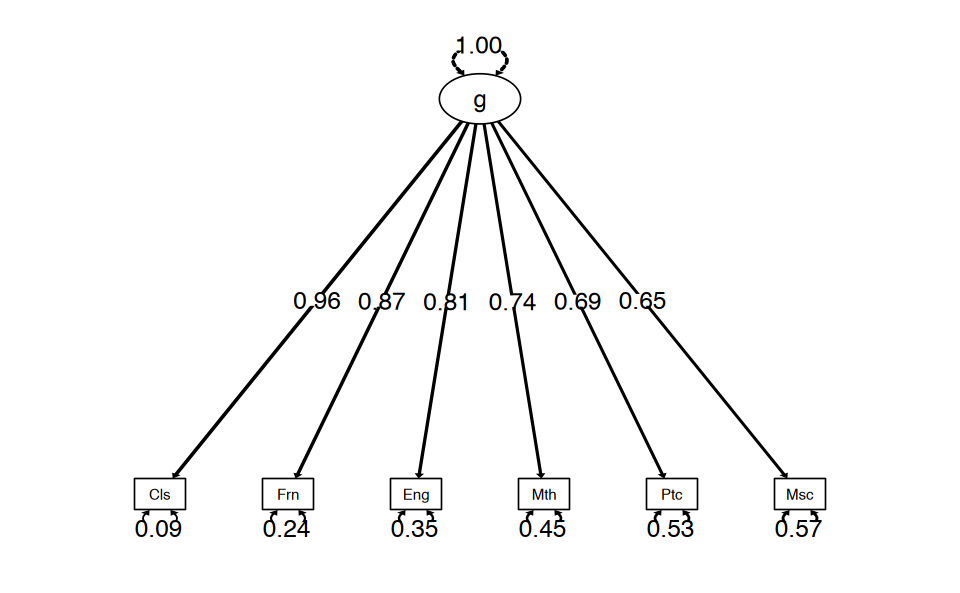

In [46]:
semPaths(
    fit1,
    "std",
    posCol = c("black"),
    edge.label.cex = 1.2,
    whatLabels = "std", 
    edge.width = 0.3, # Imposta lo spessore delle linee 
    fade = FALSE # Disabilita il fading
)

Il calcolo delle saturazioni fattoriali con il metodo del centroide aveva prodotto il seguente risultato: 

- classici (Cls): 0.97
- inglese (Eng): 0.84
- matematica (Mth): 0.73
- pitch discrimination (Ptc): 0.65

Si noti la somiglianza con i valori ottenuti mediante il metodo di massima verosimiglianza riportati nella figura.

## Analisi fattoriale esplorativa

Quando abbiamo un'unica variabile latente, l'analisi fattoriale confermativa si riduce al caso dell'analisi fattoriale esplorativa. Esaminiamo qui sotto la sintassi per l'analisi fattoriale esplorativa in `lavaan`. 

Specifichiamo il modello.

In [47]:
efa_model <- '
    efa("efa")*g =~ Classics + French + English + Math + Pitch + Music
'

Adattiamo il modello ai dati.

In [48]:
fit2 <- lavaan::cfa(
  efa_model,
  sample.cov = spearman_cor_mat,
  sample.nobs = n,
  std.lv = TRUE
)

Esaminiamo la soluzione ottenuta.

In [49]:
summary(fit2, standardized = TRUE) |>
    print()

lavaan 0.6-19 ended normally after 3 iterations

  Estimator                                         ML
  Optimization method                           NLMINB
  Number of model parameters                        12

  Rotation method                       GEOMIN OBLIQUE
  Geomin epsilon                                 0.001
  Rotation algorithm (rstarts)                GPA (30)
  Standardized metric                             TRUE
  Row weights                                     None

  Number of observations                            33

Model Test User Model:
                                                      
  Test statistic                                 2.913
  Degrees of freedom                                 9
  P-value (Chi-square)                           0.968

Parameter Estimates:

  Standard errors                             Standard
  Information                                 Expected
  Information saturated (h1) model          Structured

Latent Variables:
   

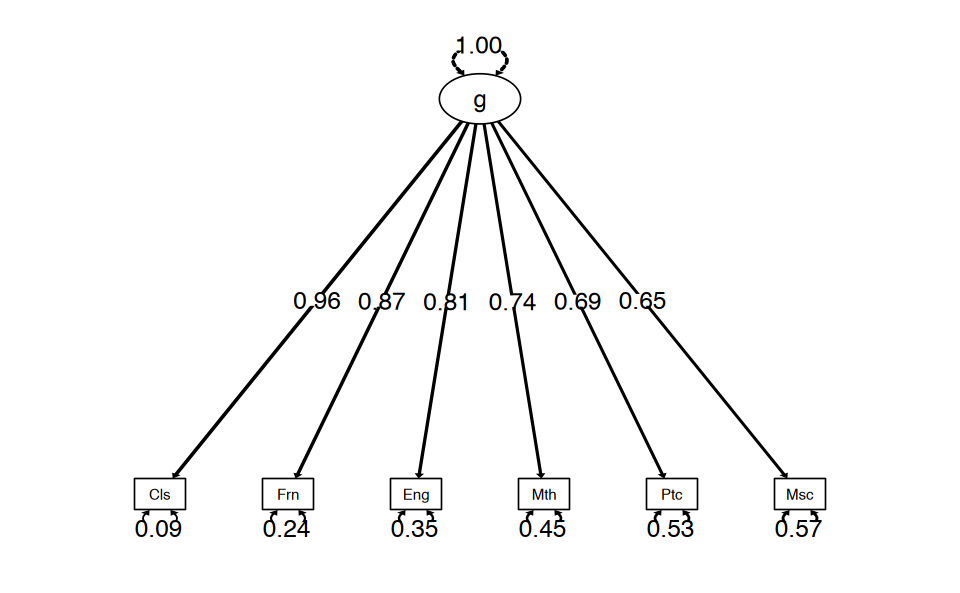

In [50]:
semPaths(
    fit2,
    "std",
    posCol = c("black"),
    edge.label.cex = 1.2,
    whatLabels = "std",
    edge.width = 0.3, # Imposta lo spessore delle linee
    fade = FALSE # Disabilita il fading
)

## Riflessioni Conclusive

In questo capitolo, abbiamo introdotto il metodo dell’annullamento della tetrade, che permette di stimare le saturazioni in un modello monofattoriale. Abbiamo anche illustrato come questo metodo sia, in effetti, un’applicazione del concetto di correlazione parziale.

Un aspetto fondamentale nella costruzione dei test psicologici riguarda la determinazione del numero di fattori o tratti sottostanti al set di indicatori in esame. La teoria classica dei test presuppone che un test sia monofattoriale, cioè che gli indicatori riflettano un unico tratto latente. La mancata monodimensionalità introduce difficoltà nell’applicare i principi della teoria classica ai punteggi di un test che non soddisfa tale proprietà.

L’analisi della dimensionalità di un insieme di indicatori rappresenta, quindi, una fase cruciale nel processo di costruzione di un test. Solitamente, questa valutazione viene effettuata attraverso l’analisi fattoriale. In questo capitolo, abbiamo descritto le proprietà di base del modello unifattoriale, gettando le fondamenta per una comprensione più approfondita della dimensionalità e dell'influenza di un singolo tratto latente sugli indicatori.

## Session Info

In [51]:
sessionInfo()

R version 4.4.1 (2024-06-14)
Platform: aarch64-apple-darwin20
Running under: macOS 15.0.1

Matrix products: default
BLAS:   /Library/Frameworks/R.framework/Versions/4.4-arm64/Resources/lib/libRblas.0.dylib 
LAPACK: /Library/Frameworks/R.framework/Versions/4.4-arm64/Resources/lib/libRlapack.dylib;  LAPACK version 3.12.0

locale:
[1] C

time zone: Europe/Rome
tzcode source: internal

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods  
[7] base     

other attached packages:
 [1] lavaanExtra_0.2.1 lavaanPlot_0.8.1  kableExtra_1.4.0 
 [4] corrplot_0.94     nortest_1.0-4     MASS_7.3-61      
 [7] ggokabeito_0.1.0  viridis_0.6.5     viridisLite_0.4.2
[10] ggpubr_0.6.0      ggExtra_0.10.1    gridExtra_2.3    
[13] patchwork_1.3.0   bayesplot_1.11.1  semTools_0.5-6   
[16] semPlot_1.1.6     lavaan_0.6-19     psych_2.4.6.26   
[19] scales_1.3.0      markdown_1.13     knitr_1.48       
[22] lubridate_1.9.3   forcats_1.0.0     stringr_1.5.1    
[25] dplyr_1.1.